## Clustering Basics and Model Evaluation

Cluster analysis or clustering is the task of grouping unlabeled data to cluster, os that similar object belongs to the same cluster. This snippet shows how to use a cluster algorithm with the iris dataset and evaluate the cluster with an internal and external evaluation method.


In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd

from sklearn import cluster, datasets, manifold, metrics


Depending on the clustering algorithm we have to set some parameters. Here we use k-means clustering, so we have to specify the number of clusters we expect in the dataset.

In [143]:
iris = datasets.load_iris()

n_clusters = 3
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=100)
label = kmeans.fit_predict(iris.data)

Now we plot the true and the predicted clusters.

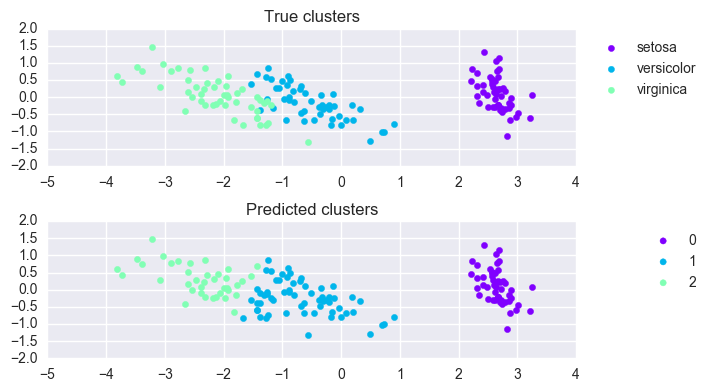

In [144]:
mds = manifold.MDS(n_components=2)
new_dim = mds.fit_transform(iris.data)

df = pd.DataFrame(new_dim, columns=['X', 'Y'])

fig = plt.figure()
n_true_clusters = 3

n = max(n_clusters, n_true_clusters)
colors = [cm.rainbow(i/(n + 1)) for i in range(n)]


ax = fig.add_subplot(211)
for i in range(n_true_clusters):
    plt.scatter(df[iris.target == i].X, df[iris.target == i].Y, color=colors[i], label=iris.target_names[i])

ax.set_title('True clusters')
plt.legend(bbox_to_anchor=(1.25, 1))

ax = fig.add_subplot(212)
for i in range(n_clusters):
    plt.scatter(df[label == i].X, df[label == i].Y, color=colors[i], label=i)

ax.set_title('Predicted clusters')
plt.legend(bbox_to_anchor=(1.25, 1))

fig.tight_layout()

Next we can evaluate how well the predicted cluster are separted with an internal metric like the silhouette score.

In [145]:
silhouette_avg = metrics.silhouette_score(iris.data, label, metric='euclidean')
print(silhouette_avg)

0.552591944521


With a boxplot we can easily plot the silhouette score for every cluster.

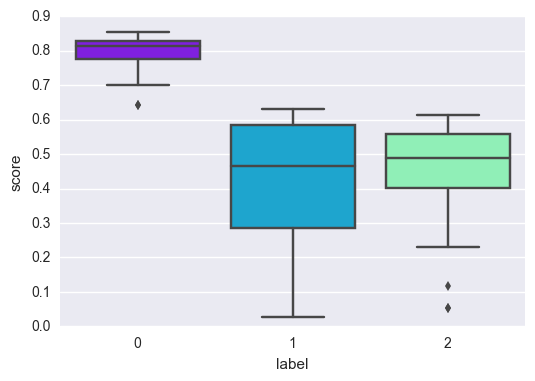

In [146]:
sample_silhouette_values = pd.DataFrame(metrics.silhouette_samples(iris.data, label), columns=['score'])
sample_silhouette_values['label'] = label

sns.boxplot(x="label", y="score", data=sample_silhouette_values, palette=colors)

With the adjusted rand score we can evaluate the cluster when the ground truth is known.

In [147]:
metrics.adjusted_rand_score(iris.target, label)

0.73023827228346971

Predict new values with the fitted model.

In [149]:
N = [[1.9,  3.2,  1.3,  0.1],
       [ 6.2,  3.1,  4.5,  1.6],
       [ 6.9,  3.3,  5.9,  2.3]]

kmeans.predict(N)

array([0, 1, 2], dtype=int32)